In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics

In [3]:
data = pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1')

Podaci ucitani na ovaj nacin nemaju pravilno imenovane atribute, pa su preimenovani sa odgovarajucim nazivima 

In [4]:
data = data.rename(columns={'0':'Sentiment',
                     '1467810369': 'Tweet ID',
                     'Mon Apr 06 22:19:45 PDT 2009':'Date',
                     'NO_QUERY':'Query',
                     '_TheSpecialOne_':'Username',
                     "@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Tweet'})

In [5]:
data.head(2)

,Sentiment,Tweet ID,Date,Query,Username,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


Sentiment atribut oznacava da li je tvit pozitivan ili negativan. Vrednosti oznacene sa 0 odgovaraju negativnom sentimentu, 2 odgovara neutralnom sentimentu, dok 4 odgovara pozitivnom sentimentu

In [6]:
sentiments = data['Sentiment'].value_counts().keys()
sentiments

Index([4, 0], dtype='int64', name='Sentiment')

In [7]:
np.unique(sentiments)

array([0, 4], dtype=int64)

<BarContainer object of 2 artists>

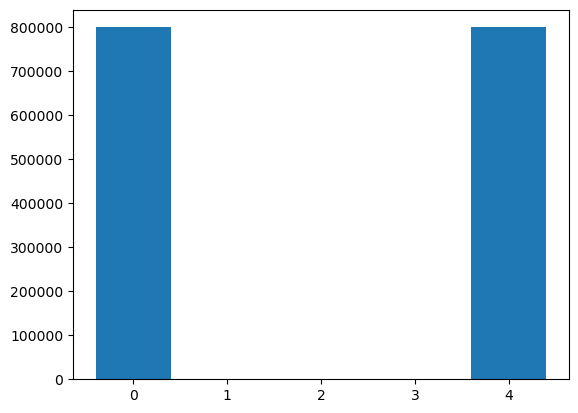

In [8]:
plt.bar(data['Sentiment'].value_counts().keys(), data['Sentiment'].value_counts().values)

Kao sto mozemo da primetimo, uklonjeni su svi neutralni sentimenti, sa tim na umu su remapirane ciljne vrednosti u 0 (negativan) i 1 (pozitivan)

In [9]:
def Sentiment_remap(x):
    if x == 0:
        return 0
    else:
        return 1

In [10]:
data['Sentiment'] = data['Sentiment'].apply(Sentiment_remap)

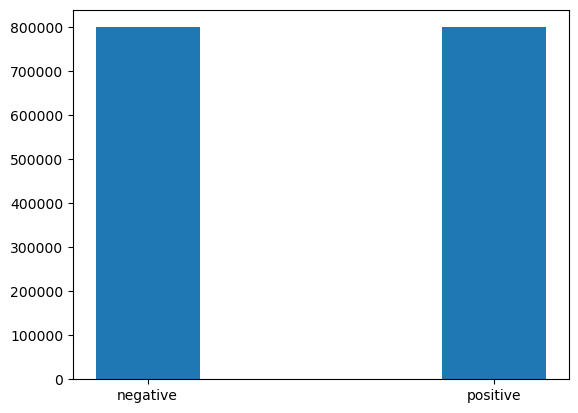

In [11]:
plt.bar(data['Sentiment'].value_counts().keys(),data['Sentiment'].value_counts().values, width = 0.3)
plt.xticks([0,1], labels=['negative', 'positive'])
plt.show()

In [12]:
x = data['Tweet']
y = data['Sentiment']

In [13]:
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (1599999,)
y shape:  (1599999,)


In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,train_size=0.01,test_size=0.01, stratify=y, random_state = 7)

In [15]:
print(x_train.shape)
print(x_test.shape)

(15999,)
(16000,)


Napravljena je vektorska reprezentacija teksta metodom Vreca reci

In [16]:
tweet_count_vectorizer = feature_extraction.text.CountVectorizer(min_df=2)

In [17]:
tweet_count_vectorizer.fit(x_train)

CountVectorizer(min_df=2)

In [18]:
feature_names = tweet_count_vectorizer.get_feature_names_out()

In [19]:
len(feature_names)

7543

In [20]:
x_train_vectorized = tweet_count_vectorizer.transform(x_train)
x_test_vectorized = tweet_count_vectorizer.transform(x_test)

# Model 1 - logisticka regresija

In [21]:
model1 = linear_model.LogisticRegression()

In [22]:
model1.fit(x_train_vectorized,y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Tacnost modela na trening i test skupu

In [24]:
model1_skor_train = model1.score(x_train_vectorized, y_train)
model1_skor_test = model1.score(x_test_vectorized, y_test)

In [25]:
print("skor na podacima za treniranje: ", model1_skor_train)
print('skor na podacima za testiranje: ', model1_skor_test)

skor na podacima za treniranje:  0.87411713232077
skor na podacima za testiranje:  0.7543125


### Matrica konfuzije - logisticka regresija

In [41]:
y_predicted_lr = model1.predict(x_test_vectorized)

In [42]:
matrica_konfuzije_lr = metrics.confusion_matrix(y_test, y_predicted_lr)
matrica_konfuzije_lr

array([[5939, 2061],
       [1870, 6130]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

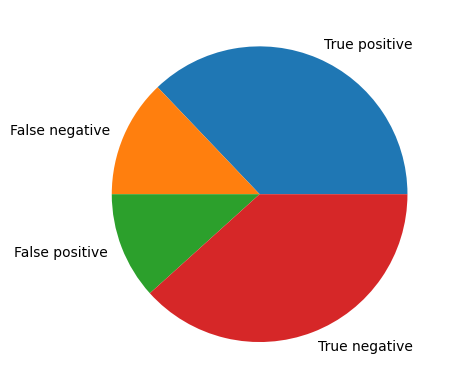

In [43]:
plt.pie(matrica_konfuzije_lr.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 2 - linearni SVM

In [29]:
model2 = svm.LinearSVC()

In [30]:
model2.fit(x_train_vectorized, y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [31]:
model2_skor_train = model2.score(x_train_vectorized, y_train)
model2_skor_test = model2.score(x_test_vectorized, y_test)

In [32]:
print("skor na podacima za treniranje: ", model2_skor_train)
print('skor na podacima za testiranje: ', model2_skor_test)

skor na podacima za treniranje:  0.924245265329083
skor na podacima za testiranje:  0.726375


In [33]:
y_pred_svm = model2.predict(x_test_vectorized)
matrica_konfuzije_svm = metrics.confusion_matrix(y_test, y_pred_svm)
matrica_konfuzije_svm

array([[5742, 2258],
       [2120, 5880]], dtype=int64)

### Matrica konfuzije - linearni SVM

<function matplotlib.pyplot.show(close=None, block=None)>

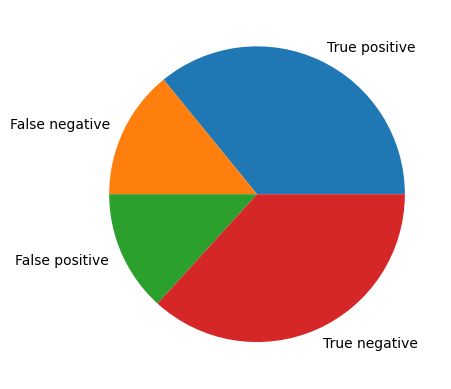

In [34]:
plt.pie(matrica_konfuzije_svm.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 3 - k najblizih suseda

In [35]:
model3 = neighbors.KNeighborsClassifier(n_neighbors=4)

In [36]:
model3.fit(x_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
model3_skor_train = model3.score(x_train_vectorized, y_train)
model3_skor_test = model3.score(x_test_vectorized, y_test)

In [38]:
print("skor na podacima za treniranje: ", model3_skor_train)
print('skor na podacima za testiranje: ', model3_skor_test)

skor na podacima za treniranje:  0.7845490343146446
skor na podacima za testiranje:  0.6258125


In [39]:
y_pred_kneigh = model3.predict(x_test_vectorized)
matrica_konfuzije_kneigh = metrics.confusion_matrix(y_test, y_pred_kneigh)
matrica_konfuzije_kneigh

array([[5101, 2899],
       [3088, 4912]], dtype=int64)

### Matrica konfuzije - k najblizih suseda

<function matplotlib.pyplot.show(close=None, block=None)>

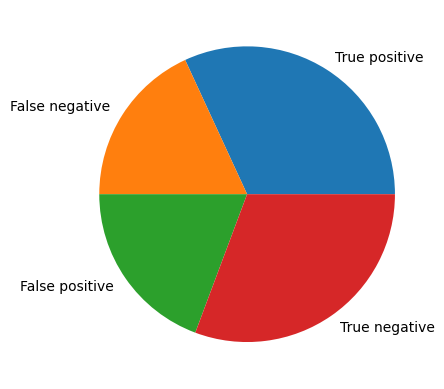

In [40]:
plt.pie(matrica_konfuzije_kneigh.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show